In [1]:
import string  
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import preprocessing 
import re

In [2]:
# veri seti okumasi
data=pd.read_csv("Twitter_Data.csv")

In [6]:
# kac tane veri var
data.count()

clean_text    162976
category      162973
dtype: int64

In [3]:
# ilk 10 veri gorunmesi
data.head(10)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
5,kiya tho refresh maarkefir comment karo,0.0
6,surat women perform yagna seeks divine grace f...,0.0
7,this comes from cabinet which has scholars lik...,0.0
8,with upcoming election india saga going import...,1.0
9,gandhi was gay does modi,1.0


In [4]:
# category gorunmesi
data.category.unique()

array([-1.,  0.,  1., nan])

In [5]:
# nall veri var mi yok mu
data.isnull().values.any()

True

In [8]:
data.isnull().count()

clean_text    162980
category      162980
dtype: int64

In [9]:
# nall verileri silome
data=data.dropna()

In [11]:
# nallm sildiktn sonra
data.category.unique()

array([-1.,  0.,  1.])

In [12]:
data.count()

clean_text    162969
category      162969
dtype: int64

In [13]:
# nallvar mi yok mu tekrar kontrol etmek
data.isnull().values.any()

False

In [14]:
# strip yapmk
data['clean_text'] = data['clean_text'].str.replace('\d+', '')
data['clean_text'] = data['clean_text'].str.rstrip(string.digits)

C:\Users\Windows10\AppData\Local\Temp\ipykernel_2068\2126928384.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['clean_text'] = data['clean_text'].str.replace('\d+', '')


In [15]:
data[data.category==1].count()


clean_text    72249
category      72249
dtype: int64

In [16]:
data[data.category==0].count()

clean_text    55211
category      55211
dtype: int64

In [17]:
data[data.category==-1].count()

clean_text    35509
category      35509
dtype: int64

In [18]:
data

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these crores paid neerav modi not recover...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [20]:
len(data.clean_text)

162969

In [22]:
# encoder
label_encoder =preprocessing .LabelEncoder()

In [25]:
# fit transform yapmak
data['category']= label_encoder.fit_transform(data['category'])

In [26]:
data.category.unique()


array([0, 1, 2], dtype=int64)

In [57]:
# tekrar inceleme
data.head(5)

,clean_text,category
0,when modi promised “minimum government maximum...,0
1,talk all the nonsense and continue all the dra...,1
2,what did just say vote for modi welcome bjp t...,2
3,asking his supporters prefix chowkidar their n...,2
4,answer who among these the most powerful world...,2


In [29]:
# float filan var mi
for x in data.clean_text:
    if type(x)==float:
        print(x)

In [31]:
# X=veri seti lowercase yapma
X=[str(x.lower()) for x in data.clean_text]
y=data.category

In [32]:
X

['when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples',
 'talk all the nonsense and continue all the drama will vote for modi ',
 'what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax',
 'asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars',
 'answer who among these the most powerful world leader today trump putin modi may ',
 'kiya tho refresh maarkefir comment karo ',
 'surat women perform yagna seeks divine grace for narendra modi become again\n',
 'this comes from cabinet which has scholars like modi smriti and hema time introspect',
 'with upcoming election india saga going important pair look current m

In [33]:
X[:10]

['when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples',
 'talk all the nonsense and continue all the drama will vote for modi ',
 'what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax',
 'asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars',
 'answer who among these the most powerful world leader today trump putin modi may ',
 'kiya tho refresh maarkefir comment karo ',
 'surat women perform yagna seeks divine grace for narendra modi become again\n',
 'this comes from cabinet which has scholars like modi smriti and hema time introspect',
 'with upcoming election india saga going important pair look current m

In [34]:
y[:10]

C:\Users\Windows10\AppData\Local\Temp\ipykernel_2068\2116256791.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y[:10]


0    0
1    1
2    2
3    2
4    2
5    1
6    1
7    1
8    2
9    2
Name: category, dtype: int64

In [35]:
# training veri seti ve testing veri seti ayarlama
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,shuffle=True ,test_size=0.2)

In [36]:
X_train

['how about this year old having enough sense realize modi famous person',
 'sure modi receiving negative feedback from constituencies various sources including desperate and frustrated create lahar\nbut failing miserably ghanta lahar',
 'vijay mallya lashes out modi govt psu banks for double standards after jet airways bailout ',
 'election commission puts modi’ kisan scheme hold till election the new indian express ',
 'fail understand distress\ndid ask ppl totherefr vote bjp didnt credit success drdo whm wdnt hav possbl\ndidnt applaud hitherto peaceful policyfocus goi ever since lastly voters shd knw politcl will dat made possbl',
 'its not bogey man straw man argument joshi poisonous modi its simple thing anyone can understand',
 'already listened dozens his videos all fine hes the humanist behind akshaya patra but always being pro modi even when govt backstabs hindus all issues putting lemon drops milk and please dont worry about others jobs',
 'watch the video from mts what modi 

In [37]:
y_test

64849     2
89165     1
105022    0
106873    2
110886    1
         ..
74436     1
149760    1
52896     1
140127    1
46046     2
Name: category, Length: 32594, dtype: int64

In [38]:
# list donusturme
X_train=[x for x in X_train]
X_test=[x for x in X_test]

In [40]:
print(type(X_train))

<class 'list'>


In [41]:
X_train

['how about this year old having enough sense realize modi famous person',
 'sure modi receiving negative feedback from constituencies various sources including desperate and frustrated create lahar\nbut failing miserably ghanta lahar',
 'vijay mallya lashes out modi govt psu banks for double standards after jet airways bailout ',
 'election commission puts modi’ kisan scheme hold till election the new indian express ',
 'fail understand distress\ndid ask ppl totherefr vote bjp didnt credit success drdo whm wdnt hav possbl\ndidnt applaud hitherto peaceful policyfocus goi ever since lastly voters shd knw politcl will dat made possbl',
 'its not bogey man straw man argument joshi poisonous modi its simple thing anyone can understand',
 'already listened dozens his videos all fine hes the humanist behind akshaya patra but always being pro modi even when govt backstabs hindus all issues putting lemon drops milk and please dont worry about others jobs',
 'watch the video from mts what modi 

In [89]:
# tokenizer=Tokenizer(oov_token=
#
# tokenizer.fit_on_texts(X_train)
# word_index=tokenizer.word_index

In [42]:
# tokenizer yapama ve  sequence yapam ve post padding kullanmak
oov_tok = "<OOV>"
tokenizer = Tokenizer(num_words=10000, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=100, padding='post', truncating='post')

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=100, padding='post', truncating='post')


In [43]:
# 
training_padded = np.array(training_padded)

testing_padded = np.array(testing_padded)


In [44]:
y_train=np.array(y_train)
print(type(y_train))
print(y_train)

<class 'numpy.ndarray'>
[2 0 1 ... 2 1 2]


In [45]:
# model tasarim
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=100),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
     tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='sigmoid')
])

#optimizer
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [46]:
#model ozeti
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 64)                1600      
                                                                 
 dense_2 (Dense)             (None, 5)                 325       
                                                                 
Total params: 162,333
Trainable params: 162,333
Non-trainable params: 0
__________________________________________________

In [47]:
# training
history = model.fit(training_padded, y_train, epochs=20, verbose=2)

Epoch 1/20
4075/4075 - 29s - loss: 0.7209 - accuracy: 0.6763 - 29s/epoch - 7ms/step
Epoch 2/20
4075/4075 - 32s - loss: 0.2367 - accuracy: 0.9276 - 32s/epoch - 8ms/step
Epoch 3/20
4075/4075 - 30s - loss: 0.1640 - accuracy: 0.9532 - 30s/epoch - 7ms/step
Epoch 4/20
4075/4075 - 34s - loss: 0.1410 - accuracy: 0.9607 - 34s/epoch - 8ms/step
Epoch 5/20
4075/4075 - 38s - loss: 0.1280 - accuracy: 0.9640 - 38s/epoch - 9ms/step
Epoch 6/20
4075/4075 - 32s - loss: 0.1174 - accuracy: 0.9664 - 32s/epoch - 8ms/step
Epoch 7/20
4075/4075 - 29s - loss: 0.1077 - accuracy: 0.9683 - 29s/epoch - 7ms/step
Epoch 8/20
4075/4075 - 28s - loss: 0.0975 - accuracy: 0.9707 - 28s/epoch - 7ms/step
Epoch 9/20
4075/4075 - 27s - loss: 0.0889 - accuracy: 0.9725 - 27s/epoch - 7ms/step
Epoch 10/20
4075/4075 - 31s - loss: 0.0813 - accuracy: 0.9745 - 31s/epoch - 8ms/step
Epoch 11/20
4075/4075 - 27s - loss: 0.0744 - accuracy: 0.9764 - 27s/epoch - 7ms/step
Epoch 12/20
4075/4075 - 28s - loss: 0.0669 - accuracy: 0.9785 - 28s/epoch 

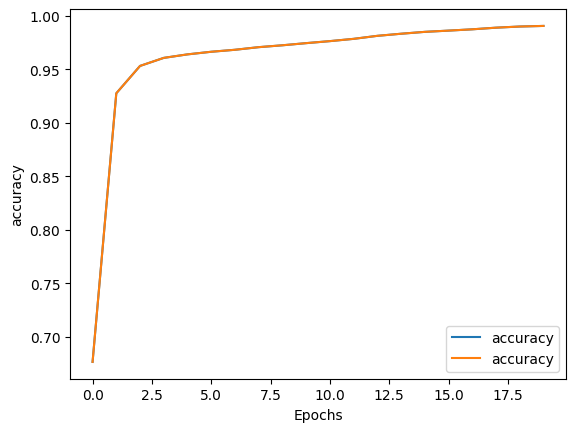

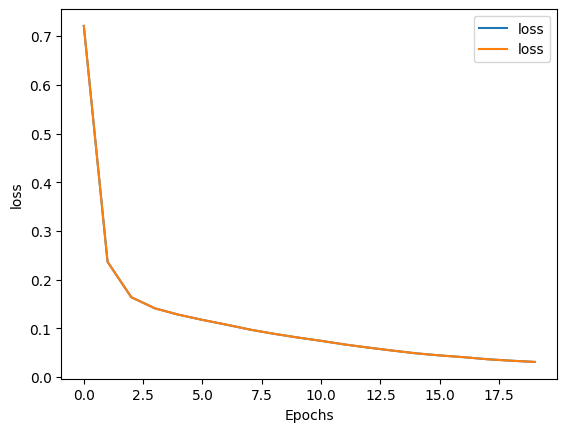

In [48]:
import matplotlib.pyplot as plt

# accuracy  ve kayip gostermek
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, string])
  plt.show()
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [49]:
#testing yapmak
y_test=np.array(y_test)

In [50]:
# evaluating
histo=model.evaluate(testing_padded,y_test)

1019/1019 [==============================] - 4s 4ms/step - loss: 0.3273 - accuracy: 0.9415


In [51]:
#veri setide
sentiment_dic={
    'negatif':0,
    'positif':2,
    'notr':1,
  


}

In [55]:
# testing
sentence = ["when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples"]

sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')
prediction=model.predict(padded)
print(prediction)

1/1 [==============================] - 0s 42ms/step
[[9.9663341e-01 1.9716943e-04 6.6280305e-01 9.5631094e-20 1.4244046e-19]]


In [56]:
print(np.argmax(prediction))

0


In [58]:
#model kaydetmek
model.save('tweetter.h5')

In [59]:
import pickle

# tokenizer kaydetmek
with open('tweeter_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)